In [1]:
import anndata as ad
import scanpy as sc
import umap
import numpy as np
import matplotlib.pyplot as plt

# Embeddings generated by Pre-trained Geneformer

In [2]:
# Loads in the AnnData object w/ embeddings for all the data generated by Geneformer
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_combined_filtered_embeddings_BA4_sALS_PN.h5ad"
anndata = ad.read_h5ad(anndata_path)

In [3]:
# Plots UMAP of Geneformer embeddings
sc.pp.neighbors(anndata, use_rep='X_Geneformer', n_neighbors=15, metric='euclidean')
sc.tl.umap(anndata, min_dist=0.2, spread=1.0, n_components=2, maxiter=None)

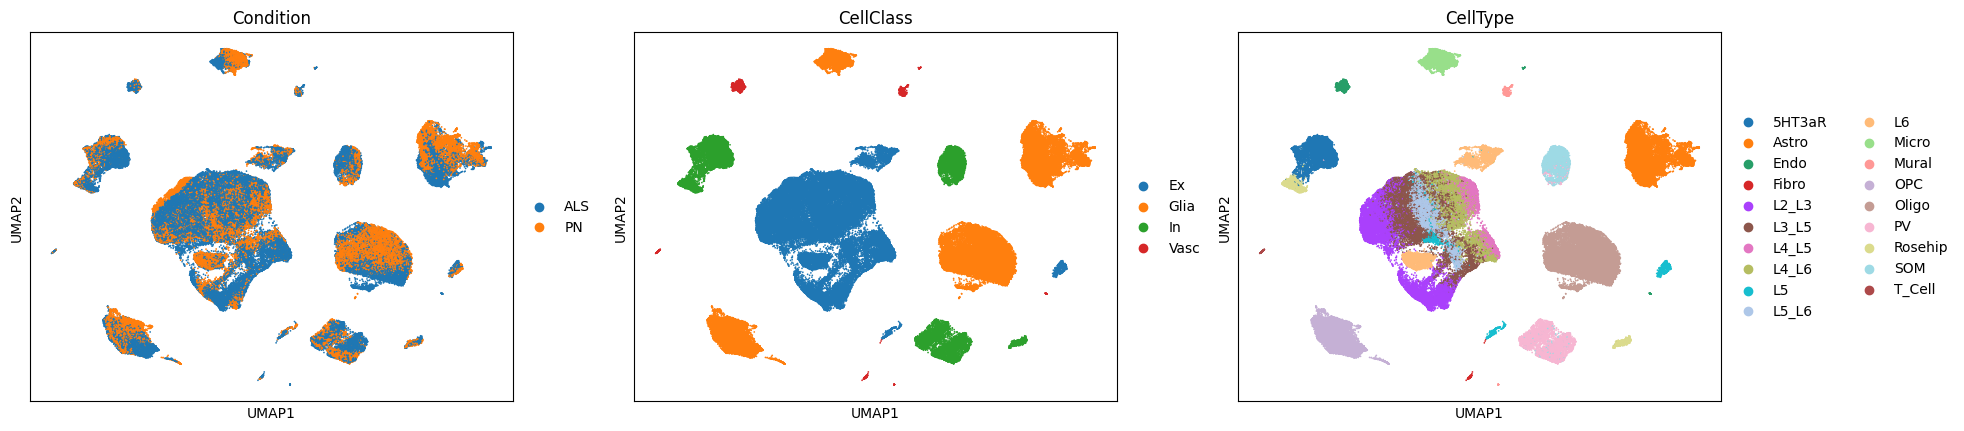

In [4]:
sc.pl.umap(anndata, color=['Condition', 'CellClass', 'CellType'], frameon=True, s=6)

# Embeddings generated by Fine-tuned Geneformer on perturbed data

Load in embeddings on unperturbed data

In [2]:
# For astrocytes
astro_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Astro_EmbeddingsFT_filtered_BA4_sALS_PN.h5ad"
astro_unperturbed = ad.read_h5ad(astro_path)

astro_unperturbed_als = astro_unperturbed[astro_unperturbed.obs['Condition'] == "ALS"]
astro_unperturbed_pn  = astro_unperturbed[astro_unperturbed.obs['Condition'] == "PN"]

# For excitatory neurons
ex_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Ex_EmbeddingsFT_filtered_BA4_sALS_PN.h5ad"
ex_unperturbed = ad.read_h5ad(ex_path)

ex_unperturbed_als = ex_unperturbed[ex_unperturbed.obs['Condition'] == "ALS"]
ex_unperturbed_pn  = ex_unperturbed[ex_unperturbed.obs['Condition'] == "PN"]

Euclidian embedding distance between unperturbed pathological and non-pathological for excitatory neurons and astrocyte

In [3]:
# Average of unperturbed ALS and PN cell embeddings
mu_astro_als = astro_unperturbed_als.obsm['X_Geneformer_FT'].mean(axis=0)
mu_astro_pn = astro_unperturbed_pn.obsm['X_Geneformer_FT'].mean(axis=0)

mu_ex_als = ex_unperturbed_als.obsm['X_Geneformer_FT'].mean(axis=0)
mu_ex_pn = ex_unperturbed_pn.obsm['X_Geneformer_FT'].mean(axis=0)

# Euclidian distance between averaged unperturbed ALS and PN embeddings 
unperturbed_astro_dist = np.linalg.norm(mu_astro_als - mu_astro_pn)
unperturbed_ex_dist = np.linalg.norm(mu_ex_als - mu_ex_pn)

print(f'Astrocyte embeddings = {unperturbed_astro_dist}')
print(f'Excitatory Neuron embeddings = {unperturbed_ex_dist}')

Astrocyte embeddings = 6.795499324798584
Excitatory Neuron embeddings = 11.886838912963867


Plot UMAP for Astrocyte and Excitatory Neuron cell embeddings

In [5]:
# Function for plot
def plot_umap(PN, sALS, n_neighbours, cell_type):
    A = PN.obsm['X_Geneformer_FT']
    B = sALS.obsm['X_Geneformer_FT']

    um = um = umap.UMAP(n_neighbors=15, min_dist=0.2, metric="euclidean")
    um.fit(np.vstack([A, B]))

    A_2d = um.transform(A)
    B_2d = um.transform(B)
    
    # Calculate Centroids
    Axy_mean = A_2d.mean(axis=0)
    Bxy_mean = B_2d.mean(axis=0)
    centroid_dist_umap = np.linalg.norm(Axy_mean - Bxy_mean)
    
    print("Centroid distance:", centroid_dist_umap)

    # Plot
    fig, ax = plt.subplots(figsize=(7, 7), dpi=120)

    ax.scatter(B_2d[:,0], B_2d[:,1], s=4, alpha=0.6, color="tab:blue", label="Healthy")
    ax.scatter(A_2d[:,0], A_2d[:,1], s=6, alpha=0.6, color="tab:orange", label="sALS")

    ax.scatter(*Bxy_mean, s=80, marker="X", color="tab:blue", edgecolors="black", label="Healthy centroid")
    ax.scatter(*Axy_mean, s=80, marker="X", color="tab:orange", edgecolors="black", label="sAls centroid")

    ax.set_title(f"UMAP of Healthy and sALS cell embeddings in {cell_type}")
    ax.set_xlabel("UMAP-1")
    ax.set_ylabel("UMAP-2")
    ax.legend(frameon=True)
    plt.tight_layout()
    plt.show()

Centroid distance: 4.4535923


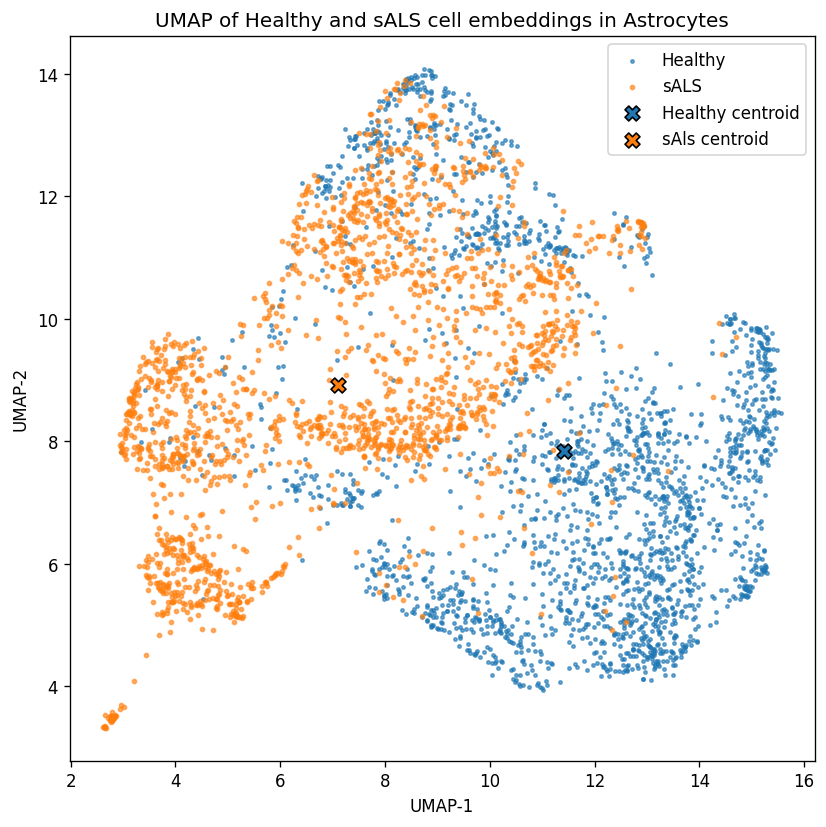

Centroid distance: 6.017125


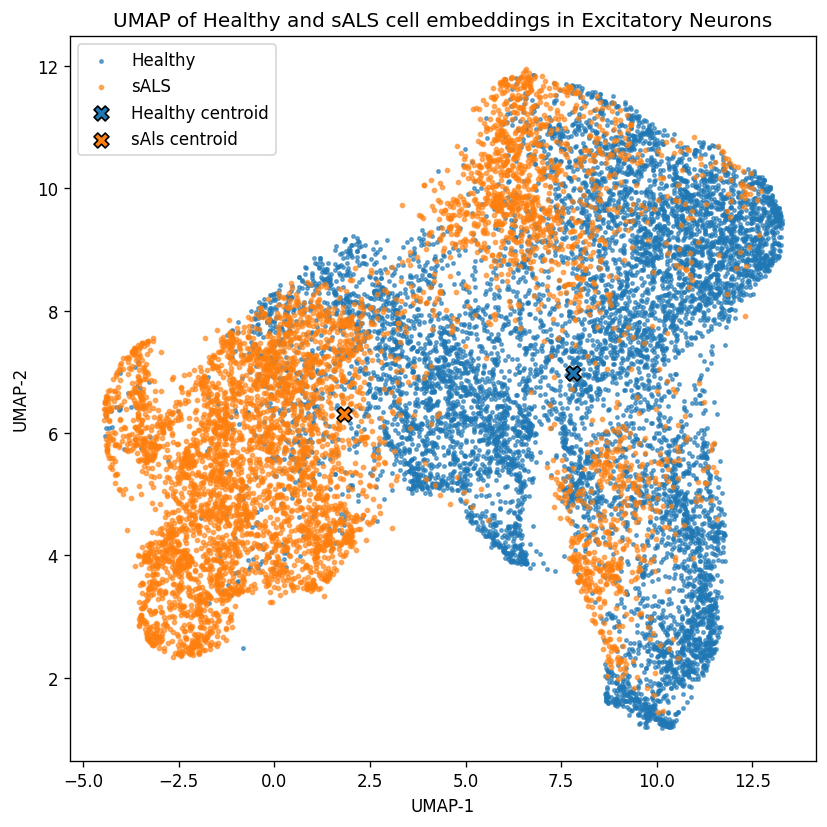

In [6]:
# For astrocytes
plot_umap(astro_unperturbed_pn, astro_unperturbed_als, 15, 'Astrocytes')
# For excitatory neurons
plot_umap(ex_unperturbed_pn, ex_unperturbed_als, 15, 'Excitatory Neurons')

**Astrocyte perturbations**

Perturbing ALS cells to simulate healthy cells

In [ ]:
# PTGD5 with x4 of initial expression in ALS Astro cells
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Astro_filtered_BA4_ALS_PTGDS.h5ad"
als_astro_perturb_1 = ad.read_h5ad(anndata_path)

# CTNNA2 with x0.05 of initial expression in ALS Astro cells
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Astro_filtered_BA4_ALS_CTNNA2.h5ad"
als_astro_perturb_2 = ad.read_h5ad(anndata_path)

Calculate average change in euclidian distance

In [ ]:
# Load in embeddings and average by cells
mu_astro_als_perturb_1 = als_astro_perturb_1.obsm['X_Geneformer_FT'].mean(axis=0)
mu_astro_als_perturb_2 = als_astro_perturb_2.obsm['X_Geneformer_FT'].mean(axis=0)

# Euclidian distances between averaged perturbed ALS and unperturbed PN cell embeddings
perturb_astro_1_dist = np.linalg.norm(mu_astro_als_perturb_1 - mu_astro_pn)
perturb_astro_2_dist = np.linalg.norm(mu_astro_als_perturb_2 - mu_astro_pn)

print(unperturbed_astro_dist)
print(unperturbed_astro_dist - perturb_astro_1_dist)
print(unperturbed_astro_dist - perturb_astro_2_dist)

6.7954993
0.8716404914855957
0.09859611511230469


Perturbing healthy cells to simulate ALS cells

In [ ]:
# PTGD5 with x0.05, CTNNA2 with 4x of initial expression in PN Astro cells
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Astro_filtered_BA4_PN_PTGDS_CTNNA2.h5ad"
pn_astro_perturb_1 = ad.read_h5ad(anndata_path)

Calculate average change in euclidian distance

In [ ]:
# Load in embeddings and average by cells
mu_astro_pn_perturb_1 = pn_astro_perturb_1.obsm['X_Geneformer_FT'].mean(axis=0)

# Euclidian distances between averaged perturbed ALS and unperturbed PN cell embeddings
perturb_astro_1_dist = np.linalg.norm(mu_astro_als - mu_astro_pn_perturb_1)

print(unperturbed_astro_dist)
print(unperturbed_astro_dist - perturb_astro_1_dist)

6.7954993
1.165660572052002


**Excitatory Neurons**

Perturbing ALS cells to simulate healthy cells

In [ ]:
# UNC13A with x0.05 of initial expression in ALS Ex cells
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Ex_filtered_BA4_ALS_UNC13A.h5ad"
als_ex_perturb_1 = ad.read_h5ad(anndata_path)

# STMN2 with x0.05 of initial expression in ALS Ex cells
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Ex_filtered_BA4_ALS_STMN2.h5ad"
als_ex_perturb_2 = ad.read_h5ad(anndata_path)

# PABPN1 with x4 of initial expression in ALS Ex cells
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Ex_filtered_BA4_ALS_PABPN1.h5ad"
als_ex_perturb_3 = ad.read_h5ad(anndata_path)

# NEFL with x0.05 of initial expression in ALS Ex cells
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Ex_filtered_BA4_ALS_NEFL.h5ad"
als_ex_perturb_4 = ad.read_h5ad(anndata_path)

Calculate average change in euclidian distance

In [15]:
# Load in embeddings and average by cells
mu_ex_als_perturb_1 = als_ex_perturb_1.obsm['X_Geneformer_FT'].mean(axis=0)
mu_ex_als_perturb_2 = als_ex_perturb_2.obsm['X_Geneformer_FT'].mean(axis=0)
mu_ex_als_perturb_3 = als_ex_perturb_3.obsm['X_Geneformer_FT'].mean(axis=0)
mu_ex_als_perturb_4 = als_ex_perturb_4.obsm['X_Geneformer_FT'].mean(axis=0)

# Euclidian distances between averaged perturbed ALS and unperturbed PN cell embeddings
perturb_ex_1_dist = np.linalg.norm(mu_ex_als_perturb_1 - mu_ex_pn)
perturb_ex_2_dist = np.linalg.norm(mu_ex_als_perturb_2 - mu_ex_pn)
perturb_ex_3_dist = np.linalg.norm(mu_ex_als_perturb_3 - mu_ex_pn)
perturb_ex_4_dist = np.linalg.norm(mu_ex_als_perturb_4 - mu_ex_pn)

print(unperturbed_ex_dist)
print(unperturbed_ex_dist - perturb_ex_1_dist)
print(unperturbed_ex_dist - perturb_ex_2_dist)
print(unperturbed_ex_dist - perturb_ex_3_dist)
print(unperturbed_ex_dist - perturb_ex_4_dist)

11.886839
0.017074585
0.022205353
0.3666029
0.23746967


Perturbing healthy cells to simulate ALS cells

In [17]:
# NEFL x4, UNC13A x4, PABPN1 x0.05, CRYM x4, STMN2 with x4 of initial expression in PN Ex cells
anndata_path = "/home/amrinder/Documents/Github/helical_challenge/counts_Ex_filtered_BA4_PN_NEFL_UNC13A_PABPN1_CRYM_STMN2.h5ad"
pn_ex_perturb_1 = ad.read_h5ad(anndata_path)

Calculate average change in euclidian distance

In [18]:
# Load in embeddings and average by cells
mu_ex_pn_perturb_1 = pn_ex_perturb_1.obsm['X_Geneformer_FT'].mean(axis=0)

# Euclidian distances between averaged perturbed ALS and unperturbed PN cell embeddings
perturb_ex_1_dist = np.linalg.norm(mu_ex_als - mu_ex_pn_perturb_1)

print(unperturbed_ex_dist)
print(unperturbed_ex_dist - perturb_ex_1_dist)

11.886839
1.0188618
